# Setup

In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
import csv

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from ipywidgets import interact

from flask import Flask, jsonify


In [10]:
# # create and save database
# execfile("Setup_and_Organization/Database_Setup.py")
# database setup
engine = create_engine("sqlite:///Resources/database.sqlite")
conn=engine.connect()


# Reflect and query data

In [15]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [17]:
#Build the database with the info i would like to use
Person= pd.read_sql("SELECT * FROM person", conn)
Sleep= pd.read_sql("SELECT * FROM sleep", conn)
Health= pd.read_sql("SELECT * FROM health", conn)
merged_data = pd.merge(Person, Sleep, left_on='id', right_on = "person_id")
merged_data = pd.merge(merged_data, Health, left_on='person_id', right_on = "person_id")
data = merged_data[['gender_id', 'age', 'occupation_id', 'sleep_duration', 'sleep_quality', 'stress_level']]
data

,index_x,id,gender_id,age,occupation_id,index_y,person_id_x,sleep_duration,sleep_quality,sleep_disorder_id,index,person_id_y,blood_pressure,stress_level,heart_rate,systolic,diastolic,bmi_id
0,0,1,0,27,0,1,2,6.2,6,0,1,2,125/80,8,75,125,80,1
1,1,2,0,28,1,2,3,6.2,6,0,2,3,125/80,8,75,125,80,1
2,2,3,0,28,1,3,4,5.9,4,1,3,4,140/90,8,85,140,90,2
3,3,4,0,28,2,4,5,5.9,4,1,4,5,140/90,8,85,140,90,2
4,4,5,0,28,2,5,6,5.9,4,2,5,6,140/90,8,85,140,90,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,368,369,1,59,4,369,370,8.1,9,1,369,370,140/95,3,68,140,95,0
369,369,370,1,59,4,370,371,8.0,9,1,370,371,140/95,3,68,140,95,0
370,370,371,1,59,4,371,372,8.1,9,1,371,372,140/95,3,68,140,95,0
371,371,372,1,59,4,372,373,8.1,9,1,372,373,140/95,3,68,140,95,0


In [18]:
# remove columns not in use
desired_columns = ['gender_id', 'age', 'occupation_id', 'sleep_duration', 'sleep_quality', 'stress_level']
merged_data = merged_data[desired_columns]
print(merged_data)

     gender_id  age  occupation_id  sleep_duration  sleep_quality  \
0            0   27              0             6.2              6   
1            0   28              1             6.2              6   
2            0   28              1             5.9              4   
3            0   28              2             5.9              4   
4            0   28              2             5.9              4   
..         ...  ...            ...             ...            ...   
368          1   59              4             8.1              9   
369          1   59              4             8.0              9   
370          1   59              4             8.1              9   
371          1   59              4             8.1              9   
372          1   59              4             8.1              9   

     stress_level  
0               8  
1               8  
2               8  
3               8  
4               8  
..            ...  
368             3  
369        

/Users/reederickson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reederickson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reederickson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reederickson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

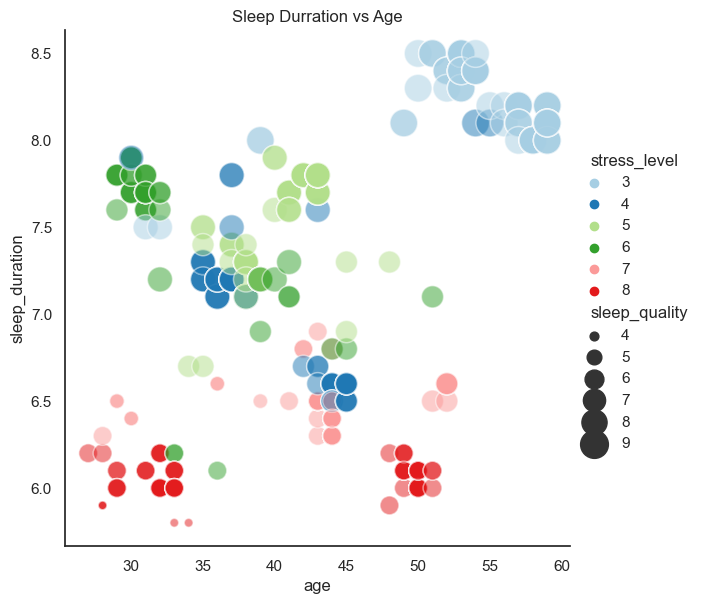

In [19]:
#seaborn scatterplot
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="age", y="sleep_duration", hue="stress_level", size="sleep_quality",
            sizes=(40, 400), alpha=.5, palette="Paired",
            height=6, data=merged_data).set(title= "Sleep Durration vs Age")